In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append('/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/src')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/data')
import py37_cplex2210 as cplex
from generator import *

In [29]:
%reload_ext autoreload
%autoreload 2
from frontal_algo import *
from Frank_Wolfe_ev import *
from Frank_Wolfe_st import *
from tools import *
K=100
nk=10

In [30]:
N=200
actual_time=0
instance_json(N)
my_instance = "../data/instance_" + str(N) + ".json"
np.random.seed(0)
stochastic = Frank_Wolfe_Stochastic(my_instance,nb_before=200,nb_ev=20)

In [32]:
list_nb=[20, 40, 60, 80 ,150, 200]
list_data_nb_ev=[]
for nb_ev in list_nb:
    my_instance = "../data/instance_" + str(N) + ".json"
    stochastic = Frank_Wolfe_Stochastic(my_instance,nb_before=N,nb_ev=nb_ev)
    x_bar_k,df = stochastic.FW_solve(actual_time, analyse=True, K=nb_ev*2, nk=nk)
    list_data_nb_ev.append(df['best_score'].values)

100%|██████████| 40/40 [00:12<00:00,  3.32iteration/s]


Gap primal dual :  1837848.802012926
Objective value is :  83151.97413506258


100%|██████████| 80/80 [00:29<00:00,  2.73iteration/s]


Gap primal dual :  1473926.9790474605
Objective value is :  37624.757825141685


100%|██████████| 120/120 [00:53<00:00,  2.25iteration/s]


Gap primal dual :  641597.4258082507
Objective value is :  12438.08462477716


100%|██████████| 160/160 [01:22<00:00,  1.95iteration/s]


Gap primal dual :  691093.942804587
Objective value is :  7556.0747380265


100%|██████████| 300/300 [03:30<00:00,  1.43iteration/s]


Gap primal dual :  367558.28844969074
Objective value is :  4170.77681572387


100%|██████████| 400/400 [05:47<00:00,  1.15iteration/s]

Gap primal dual :  205925.19211967752
Objective value is :  3185.3979877021393


In [34]:
list_nb=[20, 40, 60, 80 ,150, 200]
list_gap=[]
list_gap_score=[]
for nb_ev in list_nb:
    my_instance = "../data/instance_" + str(N) + ".json"
    stochastic = Frank_Wolfe_Stochastic(my_instance,nb_before=N,nb_ev=nb_ev)
    x_bar_k,df = stochastic.FW_solve(actual_time, analyse=True, K=nb_ev*2, nk=nk, gap_calculate=True)
    list_gap.append(df['gap_primal_dual'].values)
    list_gap_score.append(df['best_score'].values)

  0%|          | 0/40 [00:00<?, ?iteration/s]Exception ignored in: <function Cplex.__del__ at 0x7fef394bd320>
Traceback (most recent call last):
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/__init__.py", line 925, in __del__
    self.end()
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/__init__.py", line 921, in end
    self._env._end()
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal/__init__.py", line 153, in _end
    self._delete_stream(chnl_idx)
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal/__init__.py", line 247, in _delete_stream
    self._streams[which_channel])
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal/_procedural.py", line 306, in delfuncdest
    check_status(env, status)
  File "/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal/_procedural.py", line 249, in __call__
    raise CplexSolverError(e

Gap primal dual :  2533135.3335383646
Objective value is :  65855.52621163028


100%|██████████| 80/80 [01:05<00:00,  1.22iteration/s]


Gap primal dual :  969722.1976718538
Objective value is :  31593.563282160696


100%|██████████| 120/120 [02:00<00:00,  1.00s/iteration]


Gap primal dual :  823735.0890782325
Objective value is :  20252.416848228364


100%|██████████| 160/160 [03:34<00:00,  1.34s/iteration]


Gap primal dual :  529575.6142167784
Objective value is :  7115.831605950056


100%|██████████| 300/300 [12:31<00:00,  2.51s/iteration]


Gap primal dual :  144779.98064242094
Objective value is :  3930.891690521292


100%|██████████| 400/400 [19:01<00:00,  2.85s/iteration]

Gap primal dual :  268217.28992772807
Objective value is :  3017.275542299407


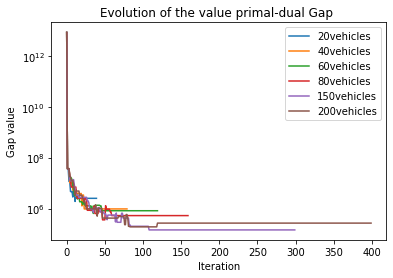

In [38]:
for i,nb in enumerate(list_nb):
    plt.plot([x for x in range(nb*2)],list_gap[i],label=str(nb)+"vehicles")
plt.yscale("log")
#plt.plot([x for x in range(100)],[frontal.objective_function(result) for x in range(100)],label="Cplex")
plt.legend()
plt.title("Evolution of the value primal-dual Gap ")
plt.xlabel("Iteration")
plt.ylabel("Gap value")
plt.show()

In [27]:
frontal = Frontal(my_instance,actual_time)
np.random.seed(0)
result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)

valeur optimal par function objective: 2089.0124989008914


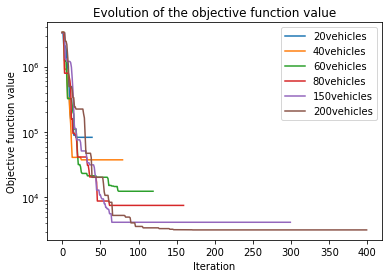

In [39]:
for i,nb in enumerate(list_nb):
    plt.plot([x for x in range(nb*2)],list_data_nb_ev[i],label=str(nb)+"vehicles")
plt.yscale("log")
#plt.plot([x for x in range(100)],[frontal.objective_function(result) for x in range(100)],label="Cplex")
plt.legend()
plt.title("Evolution of the objective function value")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.show()

valeur optimal par function objective: 2106.0277914158587
valeur optimal par function objective: 2104.0100626753733
valeur optimal par function objective: 2097.230182202993
valeur optimal par function objective: 2098.687224338291
valeur optimal par function objective: 2099.6309182297555
valeur optimal par function objective: 2102.368101481633


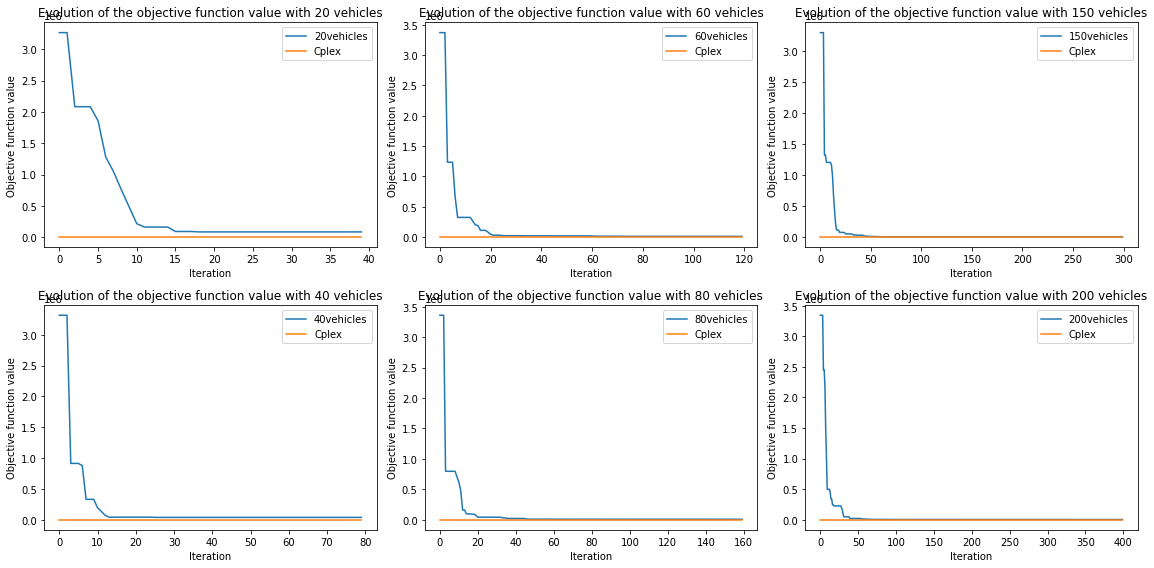

In [55]:
fig, axes = plt.subplots(len(list_nb)//3,3, figsize=(16, 8 ))

cpt=0
# Plot on each subplot
axes_y=0
for i,nb in enumerate(list_nb):
    np.random.seed(0)
    frontal = Frontal(my_instance,actual_time, nb_ev=nb, nb_before=N)
    result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)
    axes[cpt][axes_y].set_title("Evolution of the objective function value with "+str(nb)+" vehicles")
    axes[cpt][axes_y].set_xlabel("Iteration")
    axes[cpt][axes_y].set_ylabel("Objective function value")
    axes[cpt][axes_y].plot([x for x in range(nb*2)],list_data_nb_ev[i],label=str(nb)+"vehicles")
    axes[cpt][axes_y].plot([x for x in range(nb*2)],[frontal.objective_function(result) for x in range(nb*2)],label="Cplex")
    axes[cpt][axes_y].legend()
    if (cpt-1)%3==0:
        axes_y+=1
        cpt=0
    else:
        cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

## Étudier l'influence des hyper-parametres

#### 1)SOC_fin

In [56]:
list_soc_fin=[10, 100, 1000 ,10000, 100000]
list_data_nb_ev_soc_fin=[]
list_data_nb_ev_soc_fin_gap=[]
for val_soc_fin in list_soc_fin:
    my_instance = "../data/instance_" + str(N) + "_"+str(val_soc_fin)+".json"
    stochastic = Frank_Wolfe_Stochastic(my_instance)
    stochastic.penality_SOC_fin=val_soc_fin
    stochastic.data['penalties']['SOC_fin']=val_soc_fin
    x_bar_k,df = stochastic.FW_solve(actual_time, analyse=True, K=2*N, nk=nk, gap_calculate=True)
    list_data_nb_ev_soc_fin.append(df['best_score'].values)
    list_data_nb_ev_soc_fin_gap.append(df['gap_primal_dual'].values)

100%|██████████| 400/400 [16:24<00:00,  2.46s/iteration]


Gap primal dual :  126779.07231050971
Objective value is :  4480.068875837585


100%|██████████| 400/400 [15:39<00:00,  2.35s/iteration]


Gap primal dual :  242184.3601273311
Objective value is :  15407.083760246305


100%|██████████| 400/400 [17:50<00:00,  2.68s/iteration]


Gap primal dual :  316717.47902615526
Objective value is :  3811.5053501256675


100%|██████████| 400/400 [17:23<00:00,  2.61s/iteration]


Gap primal dual :  334220.4159014393
Objective value is :  3137.983909955454


100%|██████████| 400/400 [18:06<00:00,  2.72s/iteration]

Gap primal dual :  156055.16282991864
Objective value is :  2864.368024976774


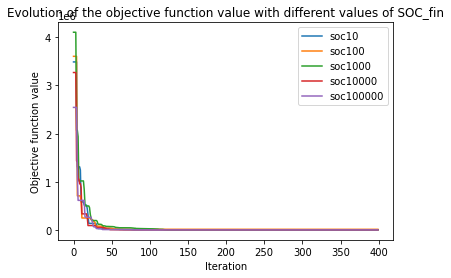

In [58]:
for i,nb in enumerate(list_soc_fin):
    plt.plot([x for x in range(400)],list_data_nb_ev_soc_fin[i],label="soc"+str(nb))
#plt.plot([x for x in range(100)],[frontal.objective_function(result) for x in range(100)],label="Frontal")
plt.title("Evolution of the objective function value with different values of SOC_fin")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.legend()
plt.show()

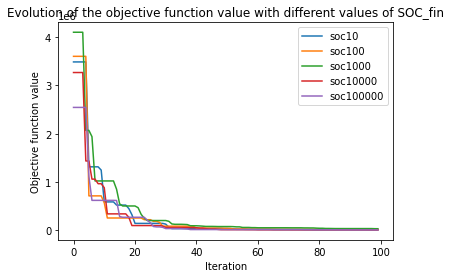

In [59]:
for i,nb in enumerate(list_soc_fin):
    plt.plot([x for x in range(100)],list_data_nb_ev_soc_fin[i][:100],label="soc"+str(nb))
#plt.plot([x for x in range(100)],[frontal.objective_function(result) for x in range(100)],label="Frontal")
plt.title("Evolution of the objective function value with different values of SOC_fin")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.legend()
plt.show()

In [63]:
from frontal_algo_no_beta import *

In [64]:
frontal = Frontal(my_instance,actual_time)
np.random.seed(0)
result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)

valeur optimal par function objective: 2109.8054477853693


In [65]:
frontal.affichage(result)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100000
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 9275.0 	 -10725.0 	 20000.0 	 0.0
1 	 8459.0 	 -11541.0 	 20000.0 	 0.0
2 	 8419.0 	 -11581.0 	 20000.0 	 0.0
3 	 8525.0 	 -11475.0 	 20000.0 	 0.0
4 	 9148.0 	 -10852.0 	 20000.0 	 0.0
5 	 8375.0 	 -11625.0 	 20000.0 	 0.0
6 	 8545.0 	 -11455.0 	 20000.0 	 0.0
7 	 8104.0 	 -11896.0 	 20000.0 	 0.0
8 	 8178.0 	 -11822.0 	 20000.0 	 0.0
9 	 7363.0 	 -12637.0 	 20000.0 	 0.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.0
30000.0 30000.